# Treatment Wetlands Aeration Efficiency: A Review <a class="tocSkip">

***Just a import of libraries***

In [71]:
import pandas as pd
import datacompy
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

This jupyter notebook serves as complementary material for the paper Treatment Wetlands Aeration Efficiency: A review

## Data search and preparation

### Raw data search

On **web of science** search engine three queries were done to find the input articles for review. The search was set as such:
1. **topic="treatment wetlands" AND topic="aeration"**
2. **topic="treatment wetland" AND topic="aeration"**
3. **topic="constructed wetlands" AND topic="aeration"**

At the first glance it seams obvious that queries for "wetland" and "wetlands" are the same, so the search query "constructed wetland" was omitted in this process. The similarity of the queries is tested further in this notebook.

The results were downloaded as text files for further analysis.

**Date of the search was 14. 11. 2018**

In [2]:
# importing the text files as pandas dataframes for futher processing

query_1 = pd.read_csv("data/raw/treatment-wetlands_aeration.txt", sep="\t", header=0, index_col=False)
query_2 = pd.read_csv("data/raw/treatment-wetland_aeration.txt", sep="\t", header=0, index_col=False)
query_3 = pd.read_csv("data/raw/constructed-wetlands_aeration.txt", sep="\t", header=0, index_col=False)

In [3]:
# checking the table structure

query_1.head()

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,J,"Liu, FF; Fan, JL; Du, JH; Shi, X; Zhang, J; Sh...",NaN,NaN,NaN,"Liu, Fei-fei; Fan, Jinlin; Du, Jinhui; Shi, Xi...",NaN,NaN,Intensified nitrogen transformation in intermi...,SCIENCE OF THE TOTAL ENVIRONMENT,...,8,Environmental Sciences,Environmental Sciences & Ecology,GX6LB,WOS:000447871400115,30373064.0,NaN,NaN,NaN,2018-11-14
1,J,"Nivala, J; Kahl, S; Boog, J; van Afferden, M; ...",NaN,NaN,NaN,"Nivala, Jaime; Kahl, Stefanie; Boog, Johannes;...",NaN,NaN,Dynamics of emerging organic contaminant remov...,SCIENCE OF THE TOTAL ENVIRONMENT,...,13,Environmental Sciences,Environmental Sciences & Ecology,GV4NL,WOS:000446076500109,30308886.0,NaN,NaN,NaN,2018-11-14
2,J,"Masi, F; Rizzo, A; Bresciani, R; Martinuzzi, N...",NaN,NaN,NaN,"Masi, F.; Rizzo, A.; Bresciani, R.; Martinuzzi...",NaN,NaN,Lessons learnt from a pilot study on residual ...,SCIENCE OF THE TOTAL ENVIRONMENT,...,9,Environmental Sciences,Environmental Sciences & Ecology,GX5QQ,WOS:000447805500015,30114585.0,NaN,NaN,NaN,2018-11-14
3,J,"Turker, OC",NaN,NaN,NaN,"Turker, Onur Can",NaN,NaN,Simultaneous boron (B) removal and electricity...,JOURNAL OF ENVIRONMENTAL MANAGEMENT,...,12,Environmental Sciences,Environmental Sciences & Ecology,GY0PX,WOS:000448224900003,30212671.0,NaN,NaN,NaN,2018-11-14
4,J,"Song, P; Huang, GH; An, CJ; Shen, J; Zhang, P;...",NaN,NaN,NaN,"Song, Pei; Huang, Guohe; An, Chunjiang; Shen, ...",NaN,NaN,Treatment of rural domestic wastewater using m...,SCIENCE OF THE TOTAL ENVIRONMENT,...,11,Environmental Sciences,Environmental Sciences & Ecology,GU3GG,WOS:000445164000056,29990903.0,NaN,NaN,NaN,2018-11-14


***Now we will test if query with term "constructed wetlands" is similar to the query with the term "constructed wetland"***

In [4]:
# testing the similarity between query_1 and query_2 (search 1 and 2)

query_1.equals(query_2)

True

**As we can see the two terms generate equal output so we can omitt the query_2 dataset in further processing**

### Comparing the search terms

We have two datasets from searching the terms "constructed wetlands" or "treatment wetlands" and "aeration" with similar number of datapoints (rows in the table).

In [5]:
print("The number of rows for search term 'constructed wetlands' is: %d" % len(query_1))
print("The number of rows for search term 'treatment wetlands' is: %d" %len(query_3))

The number of rows for search term 'constructed wetlands' is: 444
The number of rows for search term 'treatment wetlands' is: 465


Are these dataset similar also in the content?

In [6]:
compare = datacompy.Compare(query_1, query_3, join_columns='GA', df1_name='TW', df2_name='CW')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0        TW       68   444
1        CW       68   465

Column Summary
--------------

Number of columns in common: 68
Number of columns in TW but not in CW: 0
Number of columns in CW but not in TW: 0

Row Summary
-----------

Matched on: ga
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 379
Number of rows in TW but not in CW: 65
Number of rows in CW but not in TW: 86

Number of rows with some compared columns unequal: 11
Number of rows with all compared columns equal: 368

Column Comparison
-----------------

Number of columns compared with some values unequal: 38
Number of columns compared with all values equal: 30
Total number of values which compare unequal: 229

Columns with Unequal Values or Types
------------------------------------

   Column TW dtype CW dtype  # Unequal  Max Diff  # Null Diff
32     ab   object   o

**We can see from the report that both datasets has 379 common rows and query_1 (CW) has 65 unique rows whereas query_3 (TW) has 86 unique rows.** 

### Joining and cleaning the dataset

We will now make a join with droping the duplicate rows and preserving the unique rows.

In [7]:
cw_tw_join = pd.concat([query_1, query_3]).drop_duplicates().reset_index(drop=True)
print("The number of rows in joined dataset is: %d" %len(cw_tw_join))

The number of rows in joined dataset is: 535


We will also drop unuseful columns from the dataset. (The whole list of Web of Science Core Collection Field Tags (what means the columns names abbreviations) can be found [here](https://images.webofknowledge.com/images/help/WOK/hs_wos_fieldtags.html))

In [8]:
cw_tw = cw_tw_join.loc[:, ['au', 'ti', 'de', 'so', 'di']]
df_shape = cw_tw.shape

print("Final dataset with all unique datapoints" 
      + "for search terms 'constructed wetlands'" 
      + "or 'treatment wetlands' and 'aeration'"
      + "now contains %d rows and %d columns" % (df_shape[0], df_shape[1])
     )

Final dataset with all unique datapointsfor search terms 'constructed wetlands'or 'treatment wetlands' and 'aeration'now contains 535 rows and 5 columns


In [9]:
# First five rows of the dataset

cw_tw.head()

,au,ti,de,so,di
0,"Liu, FF; Fan, JL; Du, JH; Shi, X; Zhang, J; Sh...",Intensified nitrogen transformation in intermi...,Constructed wetlands; Intermittent aeration; C...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.10.037
1,"Nivala, J; Kahl, S; Boog, J; van Afferden, M; ...",Dynamics of emerging organic contaminant remov...,Aeration; Constructed wetland; Micropollutant;...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.08.339
2,"Masi, F; Rizzo, A; Bresciani, R; Martinuzzi, N...",Lessons learnt from a pilot study on residual ...,Constructed wetland; Treatment wetland; Aerate...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.08.113
3,"Turker, OC",Simultaneous boron (B) removal and electricity...,Water treatment; Duckweed wastewater treatment...,JOURNAL OF ENVIRONMENTAL MANAGEMENT,10.1016/j.jenvman.2018.08.112
4,"Song, P; Huang, GH; An, CJ; Shen, J; Zhang, P;...",Treatment of rural domestic wastewater using m...,Rural wastewater; Multi-soil-layering system; ...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.06.331


We will rename the columns and export the raw dataset to csv file.

In [11]:
cw_tw.columns = ["authors", "title", "keywords", "periodical", "id"]

and export this dataset as csv file

In [13]:
# cw_tw.to_csv("data/intermediate/cleaned_raw_papers.csv", index=False)

### Selecting papers for further manual inspection

We will now try to narrow the final dataset even more. After inspecting several rows (or better say articles) we can see that they are from the field of constructed/treatment wetlands but they do not contain any information on topic of wetland aeration. The inspection of titles and keywords of all articles can help us to drop such articles from the dataset.

Because the topic of "aeration" can be expressed in several forms (like e.g aeration versus aerated), we will only search if the title or the keywords contains the string ***"aer"*** to include all possible forms being used.

In [14]:
# importing the cleaned raw datafile
all_papers = pd.read_csv("data/intermediate/cleaned_raw_papers.csv")
all_papers.head()

,authors,title,keywords,periodical,id
0,"Liu, FF; Fan, JL; Du, JH; Shi, X; Zhang, J; Sh...",Intensified nitrogen transformation in intermi...,Constructed wetlands; Intermittent aeration; C...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.10.037
1,"Nivala, J; Kahl, S; Boog, J; van Afferden, M; ...",Dynamics of emerging organic contaminant remov...,Aeration; Constructed wetland; Micropollutant;...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.08.339
2,"Masi, F; Rizzo, A; Bresciani, R; Martinuzzi, N...",Lessons learnt from a pilot study on residual ...,Constructed wetland; Treatment wetland; Aerate...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.08.113
3,"Turker, OC",Simultaneous boron (B) removal and electricity...,Water treatment; Duckweed wastewater treatment...,JOURNAL OF ENVIRONMENTAL MANAGEMENT,10.1016/j.jenvman.2018.08.112
4,"Song, P; Huang, GH; An, CJ; Shen, J; Zhang, P;...",Treatment of rural domestic wastewater using m...,Rural wastewater; Multi-soil-layering system; ...,SCIENCE OF THE TOTAL ENVIRONMENT,10.1016/j.scitotenv.2018.06.331


In [15]:
# defining the search term
word = "aer"

# building the filters
# filtering titles and keywords which contains 'aer' and building new columns with True / False values
cw_tw['title_filter'] = cw_tw['title'].str.contains(word) 
cw_tw['keywords_filter'] = cw_tw['keywords'].str.contains(word)
cw_tw['filter'] = cw_tw['title_filter'] + cw_tw['keywords_filter']

In [16]:
# filtering the raw dataset
filtered_dataset = cw_tw[cw_tw['filter'] > 0]

print("The number of rows in final dataset is: %d" %len(filtered_dataset))

The number of rows in final dataset is: 205


We will also export this dataset to the csv file

In [17]:
filtered_dataset = filtered_dataset.drop(["title_filter", "keywords_filter", "filter"], axis=1)

# filtered_dataset.to_csv("data/intermediate/final_set_of_papers.csv", index=False)

**After this preparation there is no other way than to screen all the selected articles manually, if their topic is really about wetland active (or forced) aeration (because we can expect there will be also a lot of articles about passive aeration of wetlands).**

You can find the manually prescreened (which means they are somehow connected to our article topic) list of papers (counting 141 papers) in the intermediate data folder in [word file](files/data/intermediate/prescreened_papers.docx) or in [txt format](files/data/intermediate/prescreened_papers.txt).

## Final Dataset

The prescreened dataset of papers (references) was supplemented with the full versions of articles (in pdf available on request). For the paper to be included in the review three criteria had to be met. The paper had to include:

1. Sufficient information on the active aeration of the wetland (at least the daily aeration time and the air flow rate), 
2. Inflow and outflow concentrations for COD, BOD or CBOD and TKN or NH4−N and
3. data for the experimental wetland such as dimensions, hydraulic retention time, hydraulic load and other data necessary for the calculations within the study. 

**Based on these criteria only 21 research articles were processed further in the review.**

###  Basic statictical description of main parameters

In [19]:
paper_list = pd.read_excel('data/raw/papers_final_list.xlsx', index_col=0)
paper_list

,Citation,Type of WW,Size,Flow Type,Feeding,Aeration placement,Aeration elements
No,,,,,,,
1,"(Araya et al., 2016)",pretreated municipal,lab-scale,vertical,batch-filled,bottom,unknown
2,"(Auvinen et al., 2017)",mun. and hospital,pilot-scale,vertical,continuous,bottom,perforated pipe in spiral
3,"(Boog et al., 2014)",pretreated domestic,pilot-scale,horizontal,intermittent,bottom,perforated pipes (FBA)
4,"(Butterworth et al., 2013)",tertiary municipal,full-scale,horizontal,continuous,bottom,perforated pipes (FBA)
5,"(Fan et al., 2013a)",synthetic,lab-scale,vertical,batch-filled,bottom,porous air spargers
6,"(Fan et al., 2013b)",synthetic,lab-scale,vertical,batch-filled,bottom,porous air spargers
7,"(Fan et al., 2013c)",synthetic,pilot-scale,horizontal,continuous,bottom-front,quadrate tubing
8,"(Foladori et al., 2013)",pretreated domestic,mesocosm,vertical,intermittent,bottom,perforated pipes
9,"(Maltais-Landry et al., 2007)",fish farm effluent,mesocosm,horizontal,continuous,bottom-front,cicular tubing


Data from these articles were extracted as individual "review cases". We can find several different review cases in some articles (experiments with different parameters) so the total number of the review cases is 49. 

In [65]:
review_cases = pd.read_excel('data/raw/review_cases.xlsx')
# print(review_cases)

The review cases are number as such that number refers to the article number in the table (list) of papers and the 'a, b, c, etc.' distinguish the individual review cases identified in that article.

In [21]:
review_cases[['water_depth_m', 'HLR_lit_m2d', 'OLR_gCOD_m2d']].describe()

,water_depth_m,HLR_lit_m2d,OLR_gCOD_m2d
count,49.000000,49.000000,49.000000
mean,0.532449,121.140722,29.973675
std,0.274949,242.925088,31.172179
min,0.150000,4.000000,2.510200
25%,0.300000,44.600000,9.000000
50%,0.600000,64.000000,26.885000
75%,0.650000,95.000000,31.072190
max,1.700000,1600.000000,150.960000


There seems to be some substantial difference in the data, especially for hydraulic loading rate. We can try to plot the data to see if these differences are only due to some specific review cases.

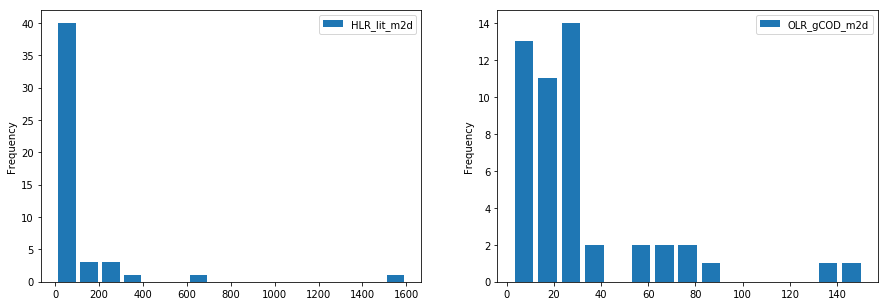

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
review_cases[['HLR_lit_m2d']].plot(kind='hist',rwidth=0.8, bins=16, ax=ax1, figsize=(15, 5))
review_cases[['OLR_gCOD_m2d']].plot(kind='hist',rwidth=0.8, ax=ax2, bins=15, figsize=(15, 5))
plt.show()

According to the histograms we can clearly see that the majority of the review cases has hydraulic loading below 100 liters par day and ORL below 30 gCOD/day.

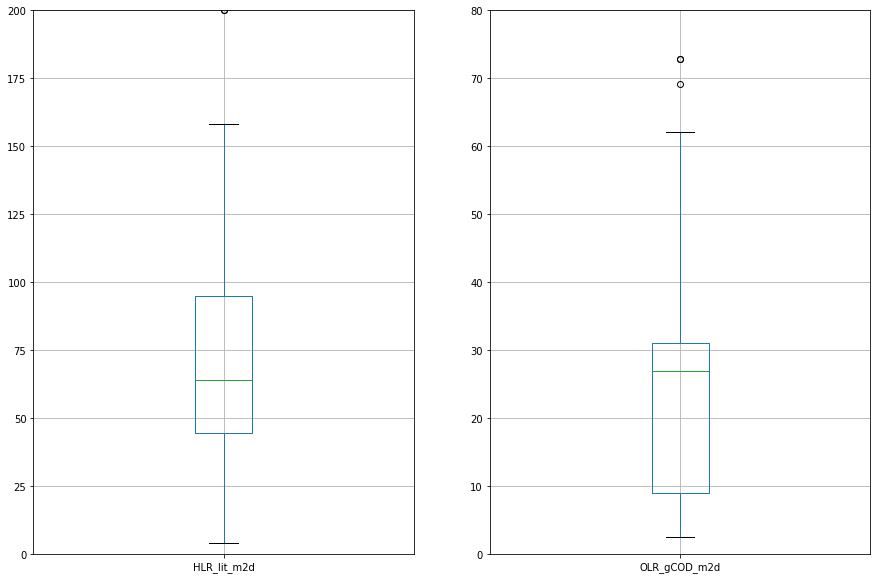

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
review_cases[['HLR_lit_m2d']].plot(kind='box', ax=ax1, figsize=(15, 10), grid=True, ylim=(0, 200))
review_cases[['OLR_gCOD_m2d']].plot(kind='box', ax=ax2, figsize=(15, 10), grid=True, ylim=(0, 80))
plt.show()

### Data Analysis

#### Oxygen consumption rates

##### Methodology

Oxygen consumption rate is defined here similar to the definition of Kadlec and Wallace (2009) and is expressed as anticipated rate of oxygen consumption in a treatment wetland due to various microbial processes. For processes including the organic carbon the COD or CBOD parameters are being used and the respective quations differs accordingly (see below). For nitrification and other pathways of N-forms reduction the parameter TKN is used where possible. If not the NH4-N is used instead without changing the respective equations.

_All rates are calculated in a volumetric as well as areal aproach (the rate is not defined per per volume unit or areal)._

OCR calculation for review cases with COD parameter.

\begin{equation}\label{eq:1}
OCR_{max-COD-V} = \frac{[1(\Delta M_{COD} + 4.6(\Delta M_{TKN})]}{V}
\end{equation}

\begin{equation}\label{eq:2}
OCR_{int-COD-V} = \frac{[0.5(\Delta M_{COD} + 1.7(\Delta M_{TKN})]}{V}
\end{equation}

\begin{equation}\label{eq:3}
OCR_{min} = \frac{[1.7(\Delta M_{TKN})]}{V}
\end{equation}

OCR calculation for review cases with CBOD parameter.

\begin{equation}\label{eq:4}
OCR_{max-CBOD-V} = \frac{[1.5(\Delta M_{COD} + 4.6(\Delta M_{TKN})]}{V}
\end{equation}

\begin{equation}\label{eq:5}
OCR_{int-CBOD-V} = \frac{[1(\Delta M_{COD} + 1.7(\Delta M_{TKN})]}{V}
\end{equation}

\begin{equation}\label{eq:6}
OCR_{min} = \frac{[1.7(\Delta M_{TKN})]}{V}
\end{equation}

$\Delta M$ is always as:

\begin{equation}\label{eq:7}
\Delta M =  Q_i \times C_i - Q_0 \times C_0
\end{equation}

<i>V</i> - volume of wetland (m3), <i>M</i> - pollutant mass flow rate (g/d), <i>Q<sub>i</sub></i> - inflow Rate (m3/d), *Q<sub>o</sub>* - outflow rate (m3/d); *C<sub>i</sub>* - inlet concentration, (g/m3), *C<sub>o</sub>* - outlet concentration (g.m3), OCR - oxygen consumption rate (g/m2.d). *V* can be changed for *A* - wetalnd area (m2) for areal rate calculation.

In our table with all review cases we have these columns already defined:
- <mark>area_m2</mark> - wetland area in square meters
- <mark>volume_m3</mark> - wetted volume of the wetland (so not the total volume, but area x depth of water)
- <mark>daily_flow_lit</mark> - daily flow in liters
- <mark>CBOD_IN</mark> - inflow concentration for CBOD in mg per liter
- <mark>CBOD_OUT</mark> - outflow concentration for CBOD in mg per liter
- <mark>deltaCBOD</mark> - difference between inflow an outflow concetration in mg per liter
- columns for COD, TKN and NH4 are defined ni similar manner

In [34]:
review_cases.columns

Index(['Reference', 'number', 'water_depth_m', 'area_m2', 'volume_m3',
       'porosity', 'voids_m3', 'HLR_lit_m2d', 'daily_flow_lit', 'OLR_gCOD_m2d',
       'HRT_h', 'HRT_days', 'air_flow_m3h', 'aer_duration_h_day',
       'air_per_day_m3', 'air_per_HRT_m3', 'COD_IN', 'COD_OUT', 'deltaCOD',
       'CBOD_IN', 'CBOD_OUT', 'deltaCBOD', 'TKN_IN', 'TKN_OUT', 'deltaTKN',
       'NH4_IN', 'NH4_OUT', 'deltaNH4'],
      dtype='object')

As the inflow and outflow volume is still the same ((in liters)) and mg/l are same as g/m3 we can compute the $\Delta M$ form equation 7 directly as $Q_d \times 0.001 \times \Delta C  $

With the help of for loop we than calculate the oxygen consumption rates in both volumetric and areal form.

In [66]:
# checking for missing COD and TKN values
COD_nan = review_cases['deltaCOD'].notnull()
TKN_nan = review_cases['deltaTKN'].notnull()

# adding blank columns for volumetric and areal OCR values before calculation  
pd.concat([review_cases, 
           pd.DataFrame(columns = ['OCR_max_v',
                                   'OCR_int_v',
                                   'OCR_min_v',
                                   'OCR_max_a',
                                   'OCR_int_a',
                                   'OCR_min_a'
                                  ])])

for i in range(0, len(review_cases)):
    
    # daily flow and volume is the same whatever conc parameters are used
    daily_flow = review_cases.loc[i, 'daily_flow_lit']
    volume = review_cases.loc[i, 'volume_m3']
    area = review_cases.loc[i, 'area_m2']
    
    # calculation for COD values
    if COD_nan[i] == True:
        deltaCOD = review_cases.loc[i, 'deltaCOD']
        
        M_COD = daily_flow * 0.001 * deltaCOD
        
        if TKN_nan[i] == True:
            deltaTKN = review_cases.loc[i, 'deltaTKN']
        else:
            deltaTKN = review_cases.loc[i, 'deltaNH4']
        
        M_TKN = daily_flow * 0.001 * deltaTKN
        
        # volumetric OCR values
        OCR_max_v = ((1 * M_COD) + (4.6 * M_TKN)) / volume
        OCR_int_v = ((0.5 * M_COD) + (1.7 * M_TKN)) / volume
        OCR_min_v = (1.7 * M_TKN) / volume

        # areal OCR values
        OCR_max_a = ((1 * M_COD) + (4.6 * M_TKN)) / area
        OCR_int_a = ((0.5 * M_COD) + (1.7 * M_TKN)) / area
        OCR_min_a = (1.7 * M_TKN) / area
        
    # calculation for CBOD values
    else:
        deltaCBOD = review_cases.loc[i, 'deltaCBOD']
        
        M_CBOD = daily_flow * 0.001 * deltaCBOD
        
        if TKN_nan[i] == True:
            deltaTKN = review_cases.loc[i, 'deltaTKN']
        else:
            deltaTKN = review_cases.loc[i, 'deltaNH4']
        
        M_TKN = daily_flow * 0.001 * deltaTKN
        
        # volumetric OCR values
        OCR_max_v = ((1.5 * M_CBOD) + (4.6 * M_TKN)) / volume
        OCR_int_v = ((1 * M_CBOD) + (1.7 * M_TKN)) / volume
        OCR_min_v = (1.7 * M_TKN) / volume

        # areal OCR values
        OCR_max_a = ((1.5 * M_CBOD) + (4.6 * M_TKN)) / area
        OCR_int_a = ((1 * M_CBOD) + (1.7 * M_TKN)) / area
        OCR_min_a = (1.7 * M_TKN) / area
    
    # writing the values to the dataframe
    review_cases.loc[i, 'OCR_max_v'] = OCR_max_v
    review_cases.loc[i, 'OCR_int_v'] = OCR_int_v
    review_cases.loc[i, 'OCR_min_v'] = OCR_min_v
    review_cases.loc[i, 'OCR_max_a'] = OCR_max_a
    review_cases.loc[i, 'OCR_int_a'] = OCR_int_a
    review_cases.loc[i, 'OCR_min_a'] = OCR_min_v

c:\users\dell\.virtualenvs\aerationreview-wzvxscyu\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [67]:
review_cases.head()

,Reference,number,water_depth_m,area_m2,volume_m3,porosity,voids_m3,HLR_lit_m2d,daily_flow_lit,OLR_gCOD_m2d,...,deltaTKN,NH4_IN,NH4_OUT,deltaNH4,OCR_max_v,OCR_int_v,OCR_min_v,OCR_max_a,OCR_int_a,OCR_min_a
0,"(Araya et al., 2016)",1a,0.15,0.063,0.00945,NaN,0.001417,15.873016,1.0,4.444444,...,NaN,114.0,27.36,86.64,61.433228,25.215661,15.586032,9.214984,3.782349,15.586032
1,"(Araya et al., 2016)",1b,0.15,0.063,0.00945,NaN,0.001417,15.873016,1.0,6.317460,...,NaN,112.0,72.80,39.20,44.351323,19.686772,7.051852,6.652698,2.953016,7.051852
2,"(Araya et al., 2016)",1c,0.15,0.063,0.00945,NaN,0.001417,15.873016,1.0,5.396825,...,NaN,54.0,11.34,42.66,47.390053,20.986455,7.674286,7.108508,3.147968,7.674286
3,"(Auvinen et al., 2017)",2a,0.75,1.000,0.75000,0.4,0.300000,360.000000,360.0,60.480000,...,NaN,24.0,0.00,24.00,121.152000,53.664000,19.584000,90.864000,40.248000,19.584000
4,"(Auvinen et al., 2017)",2b,0.75,1.000,0.75000,0.4,0.300000,680.000000,680.0,150.960000,...,NaN,33.0,5.60,27.40,289.262933,129.725867,42.232533,216.947200,97.294400,42.232533


##### Oxygen Consumption rate results

In [68]:
r_col = ['OCR_max_v', 'OCR_int_v', 'OCR_min_v', 'OCR_max_a', 'OCR_int_a', 'OCR_min_a']

for col in r_col:
    avg = review_cases[col].mean()
    median = review_cases[col].median()
    min_v = review_cases[col].min()
    max_v = review_cases[col].max()
    
    if "max" in col:
        add = " maximum "
    elif "int" in col:
        add = " intermediate "
    else:
        add = " minimum "
    
    if "v" in col:
        print("For" + add + "volumetric oxygen consumption rate the:")
    else:
        print("For" + add + "areal oxygen consumption rate the:")
        
    print("- Average value is %0.2f and median value is %0.2f g/day." % (avg, median))
    print("- Minimum value is %0.2f and maximum is %0.2f g/day." % (min_v, max_v))
    print("")

For maximum volumetric oxygen consumption rate the:
- Average value is 78.50 and median value is 59.24 g/day.
- Minimum value is 8.91 and maximum is 419.77 g/day.

For intermediate volumetric oxygen consumption rate the:
- Average value is 36.00 and median value is 27.29 g/day.
- Minimum value is 4.10 and maximum is 188.28 g/day.

For minimum volumetric oxygen consumption rate the:
- Average value is 10.20 and median value is 6.84 g/day.
- Minimum value is 1.01 and maximum is 61.22 g/day.

For maximum areal oxygen consumption rate the:
- Average value is 41.55 and median value is 33.76 g/day.
- Minimum value is 3.38 and maximum is 216.95 g/day.

For intermediate areal oxygen consumption rate the:
- Average value is 19.13 and median value is 15.98 g/day.
- Minimum value is 1.56 and maximum is 97.29 g/day.

For minimum areal oxygen consumption rate the:
- Average value is 10.20 and median value is 6.84 g/day.
- Minimum value is 1.01 and maximum is 61.22 g/day.



**Oxygen consumption rate versus organic loading**

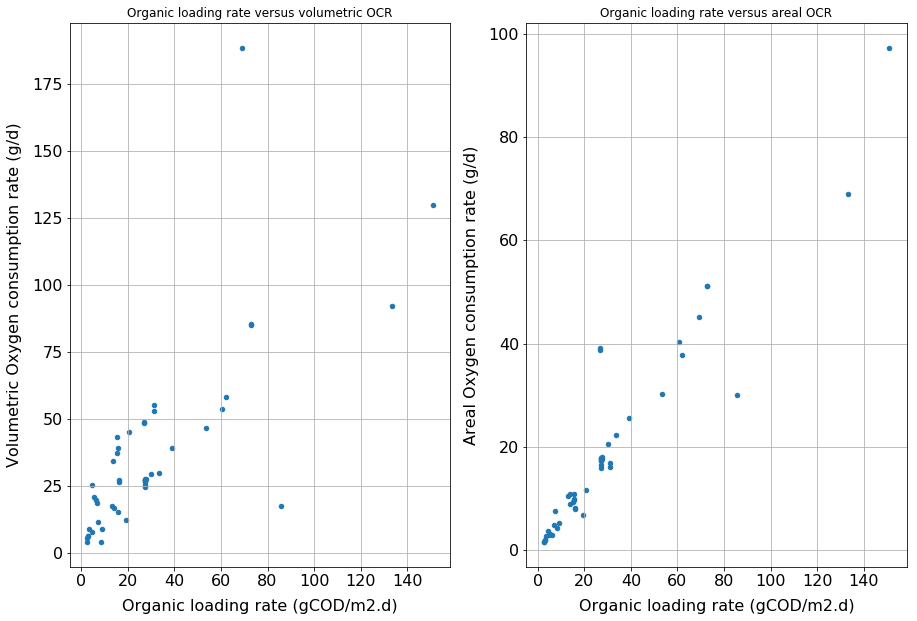

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fnt=16
labelpad=10
review_cases.plot(kind='scatter', x='OLR_gCOD_m2d', y='OCR_int_v', ax=ax1, figsize=(15, 10), grid=True,
                 title='Organic loading rate versus volumetric OCR', fontsize=fnt)
review_cases.plot(kind='scatter', x='OLR_gCOD_m2d', y='OCR_int_a', ax=ax2, figsize=(15, 10), grid=True,
                 title='Organic loading rate versus areal OCR', fontsize=fnt)
ax1.set_xlabel('Organic loading rate (gCOD/m2.d)', fontsize=fnt, labelpad=labelpad)
ax2.set_xlabel('Organic loading rate (gCOD/m2.d)', fontsize=fnt, labelpad=labelpad)
ax1.set_ylabel('Volumetric Oxygen consumption rate (g/d)', fontsize=fnt, labelpad=labelpad)
ax2.set_ylabel('Areal Oxygen consumption rate (g/d)', fontsize=fnt, labelpad=labelpad)
plt.show()

**Oxygen consumption rate versus hydraulic loading**

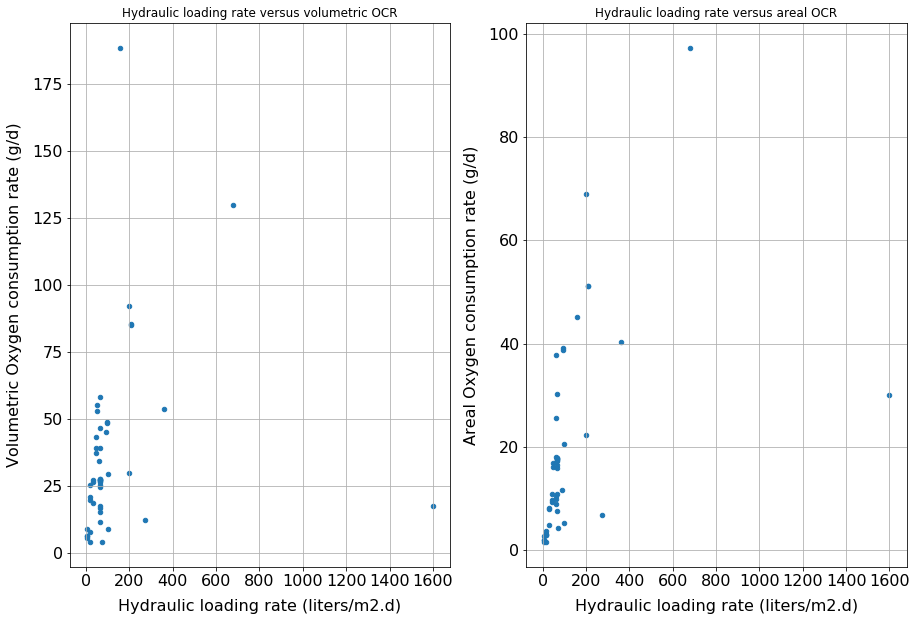

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fnt=16
labelpad=10
review_cases.plot(kind='scatter', x='HLR_lit_m2d', y='OCR_int_v', ax=ax1, figsize=(15, 10), grid=True,
                 title='Hydraulic loading rate versus volumetric OCR', fontsize=fnt)
review_cases.plot(kind='scatter', x='HLR_lit_m2d', y='OCR_int_a', ax=ax2, figsize=(15, 10), grid=True,
                 title='Hydraulic loading rate versus areal OCR', fontsize=fnt)
ax1.set_xlabel('Hydraulic loading rate (liters/m2.d)', fontsize=fnt, labelpad=labelpad)
ax2.set_xlabel('Hydraulic loading rate (liters/m2.d)', fontsize=fnt, labelpad=labelpad)
ax1.set_ylabel('Volumetric Oxygen consumption rate (g/d)', fontsize=fnt, labelpad=labelpad)
ax2.set_ylabel('Areal Oxygen consumption rate (g/d)', fontsize=fnt, labelpad=labelpad)
plt.show()

#### Oxygen consumption during HRT

##### Methodology

Oxygen consumption (OC) is calculated similar as the oxygen consumption rate. The main difference is that the oxygen consumption is not defined as rate (per unit of area / volume), but as a total oxygen consumption for a give hydraulic retention time. In other words - how much oxygen is theoretically consumed by microbial processes in the time when the wastewater enters the system till the time the water exits the system.

OC calculation for review cases with COD parameter.

\begin{equation}\label{eq:8}
OC_(max) = 1(\Delta m_{COD} + 4.6(\Delta m_{TKN})
\end{equation}

\begin{equation}\label{eq:9}
OC_(int) = 0.5(\Delta m_{COD} + 1.7(\Delta m_{TKN})
\end{equation}

\begin{equation}\label{eq:10}
OC_m = 1.7 \times m_TKN
\end{equation}

OC calculation for review cases with CBOD parameter.

\begin{equation}\label{eq:11}
OC_(max) = 1.5(\Delta m_{COD} + 4.6(\Delta m_{TKN})
\end{equation}

\begin{equation}\label{eq:12}
OC_{int} = 1(\Delta m_{COD} + 1.7(\Delta m_{TKN})
\end{equation}

\begin{equation}\label{eq:13}
OC_{min} = 1.7(\Delta m_{TKN})
\end{equation}

$ \Delta m $ is defined se the load difference after the hydraulic retention time:

\begin{equation}\label{eq:14}
\Delta m =  q_i \times C_i - q_0 \times C_0
\end{equation}

<i>m</i> - pollutant mass flow (g/HRT), <i>q<sub>i</sub></i> - inflow (m3/HRT), *q<sub>o</sub>* - outflow (m3/HRT); *C<sub>i</sub>* - inlet concentration, (g/m3), *C<sub>o</sub>* - outlet concentration (g.m3), OC - oxygen consumption during HRT (g).

We can use equivalent form of calculation for the oxygen consumption.

In [72]:
# checking for missing COD and TKN values
COD_nan = review_cases['deltaCOD'].notnull()
TKN_nan = review_cases['deltaTKN'].notnull()

# adding blank columns for OC values before calculation  
pd.concat([review_cases, 
           pd.DataFrame(columns = ['OC_max',
                                   'OC_int',
                                   'OC_min',
                                  ])])

for i in range(0, len(review_cases)):
    
    # total flow during HRT
    hrt_flow = review_cases.loc[i, 'daily_flow_lit'] * review_cases.loc[i, 'HRT_days']
    
    # calculation for COD values
    if COD_nan[i] == True:
        deltaCOD = review_cases.loc[i, 'deltaCOD']
        
        m_COD = hrt_flow * 0.001 * deltaCOD
        
        if TKN_nan[i] == True:
            deltaTKN = review_cases.loc[i, 'deltaTKN']
        else:
            deltaTKN = review_cases.loc[i, 'deltaNH4']
        
        m_TKN = hrt_flow * 0.001 * deltaTKN
        
        # OC values - COD computation
        OC_max = ((1 * m_COD) + (4.6 * m_TKN))
        OC_int = ((0.5 * m_COD) + (1.7 * m_TKN))
        OC_min = (1.7 * m_TKN)
        
    # calculation for CBOD values
    else:
        deltaCBOD = review_cases.loc[i, 'deltaCBOD']
        
        m_CBOD = hrt_flow * 0.001 * deltaCBOD
        
        if TKN_nan[i] == True:
            deltaTKN = review_cases.loc[i, 'deltaTKN']
        else:
            deltaTKN = review_cases.loc[i, 'deltaNH4']
        
        m_TKN = hrt_flow * 0.001 * deltaTKN
        
        # OC values - CBOD computation
        OC_max = ((1.5 * m_CBOD) + (4.6 * m_TKN))
        OC_int = ((1 * m_CBOD) + (1.7 * m_TKN))
        OC_min = (1.7 * m_TKN)
    
    # writing the values to the dataframe
    review_cases.loc[i, 'OC_max'] = OC_max
    review_cases.loc[i, 'OC_int'] = OC_int
    review_cases.loc[i, 'OC_min'] = OC_min

c:\users\dell\.virtualenvs\aerationreview-wzvxscyu\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




##### Oxygen Consumption results

In [76]:
r_col = ['OC_max', 'OC_int', 'OC_min']

for col in r_col:
    avg = review_cases[col].mean()
    median = review_cases[col].median()
    min_v = review_cases[col].min()
    max_v = review_cases[col].max()
    
    if "max" in col:
        add = " maximum "
    elif "int" in col:
        add = " intermediate "
    else:
        add = " minimum "
    
    if "v" in col:
        print("For" + add + "oxygen consumption the:")
    else:
        print("For" + add + "oxygen consumption the:")
        
    print("- Average value is %0.2f and median value is %0.2f g during HRT." % (avg, median))
    print("- Minimum value is %0.2f and maximum is %0.2f g during HRT." % (min_v, max_v))
    print("")

For maximum oxygen consumption the:
- Average value is 2800.68 and median value is 10.68 g during HRT.
- Minimum value is 1.19 and maximum is 80440.57 g during HRT.

For intermediate oxygen consumption the:
- Average value is 1203.79 and median value is 4.81 g during HRT.
- Minimum value is 0.56 and maximum is 35293.19 g during HRT.

For minimum oxygen consumption the:
- Average value is 576.20 and median value is 1.48 g during HRT.
- Minimum value is 0.11 and maximum is 13960.11 g during HRT.



#### Aeration efficiency

##### Methodology

In previous chapter we calculated the theoretical total amount of oxygen consumed by microbial processes during the hydraulic retention time of the wetland system. In the same manner we can now calculate the total oxygen amount delivered to the system:

\begin{equation}\label{eq:15}
OI = Q_(air) \times ATD \times HRT \times \rho_(air) \times \omega_(air)
\end{equation}

where

$OI$ - oxygen input (g/HRT), $Q_(air)$ - air flow (m3/h), $ATD$ - aeration time per day (h per day), $HRT$ - hydraulic retention time (days), $\rho_(air)$ - density of air (1215 g/m3) and  $\omega_(air)$ - a mass fraction of oxygen in air (21%)

Than we can calculate the aeration efficiency as the ratio between the total oxygen input to the system (with forced aeration) and the total amount of oxygen used in the system (oxygen input minus consumed oxygen).
The aeration efficiency will be computed for the three microbial activity scenarios (maximum, intermediate and minimum) and expressed as percents.

\begin{equation}\label{eq:16}
AE = \frac{[OI - (OI - OC)]}{OI} \times 100
\end{equation}


In [81]:
Q_air = review_cases['air_flow_m3h']
ATD = review_cases['aer_duration_h_day']
HRT = review_cases['HRT_days']

review_cases['OI'] = Q_air * ATD * HRT * 1215 * 0.21

In [82]:
OI = review_cases['OI']
OC_max = review_cases['OC_max']
OC_int = review_cases['OC_int']
OC_min = review_cases['OC_min']

review_cases['AE_max'] = (OI - (OI - OC_max)) / OI * 100
review_cases['AE_int'] = (OI - (OI - OC_int)) / OI * 100
review_cases['AE_min'] = (OI - (OI - OC_min)) / OI * 100

In [83]:
# export of the calculated file

# review_cases.to_csv('data/final/review_cases_final.csv', index=False)

## Results

In [84]:
# import of the final bresults

results = pd.read_csv('data/final/review_cases_final.csv')
results.head()

,Reference,number,water_depth_m,area_m2,volume_m3,porosity,voids_m3,HLR_lit_m2d,daily_flow_lit,OLR_gCOD_m2d,...,OCR_max_a,OCR_int_a,OCR_min_a,OC_max,OC_int,OC_min,OI,AE_max,AE_int,AE_min
0,"(Araya et al., 2016)",1a,0.15,0.063,0.00945,NaN,0.001418,15.873016,1.0,4.444444,...,9.214984,3.782349,15.586032,1.741632,0.714864,0.441864,4408.992,0.039502,0.016214,0.010022
1,"(Araya et al., 2016)",1b,0.15,0.063,0.00945,NaN,0.001418,15.873016,1.0,6.317460,...,6.652698,2.953016,7.051852,1.257360,0.558120,0.199920,183.708,0.684434,0.303808,0.108825
2,"(Araya et al., 2016)",1c,0.15,0.063,0.00945,NaN,0.001418,15.873016,1.0,5.396825,...,7.108508,3.147968,7.674286,1.343508,0.594966,0.217566,734.832,0.182832,0.080966,0.029608
3,"(Auvinen et al., 2017)",2a,0.75,1.000,0.75000,0.4,0.300000,360.000000,360.0,60.480000,...,90.864000,40.248000,19.584000,90.864000,40.248000,14.688000,8450.568,1.075241,0.476276,0.173811
4,"(Auvinen et al., 2017)",2b,0.75,1.000,0.75000,0.4,0.300000,680.000000,680.0,150.960000,...,216.947200,97.294400,42.232533,108.473600,48.647200,15.837200,4225.284,2.567250,1.151336,0.374820


### Overall results

In [89]:
r_col = ['AE_max', 'AE_int', 'AE_min']

for col in r_col:
    avg = review_cases[col].mean()
    median = review_cases[col].median()
    min_v = review_cases[col].min()
    max_v = review_cases[col].max()
    
    if "max" in col:
        add = " maximum "
    elif "int" in col:
        add = " intermediate "
    else:
        add = " minimum "
    
    print("For" + add + "aeration efficinecy the:")
        
    print("- Average value is %0.2f%% and median value is %0.2f%%." % (avg, median))
    print("- Minimum value is %0.2f%% and maximum is %0.2f%%." % (min_v, max_v))
    print("")

For maximum aeration efficinecy the:
- Average value is 3.74% and median value is 1.08%.
- Minimum value is 0.01% and maximum is 74.36%.

For intermediate aeration efficinecy the:
- Average value is 1.73% and median value is 0.48%.
- Minimum value is 0.01% and maximum is 33.72%.

For minimum aeration efficinecy the:
- Average value is 0.45% and median value is 0.14%.
- Minimum value is 0.00% and maximum is 9.80%.



### Overall results - plots

**histogram**

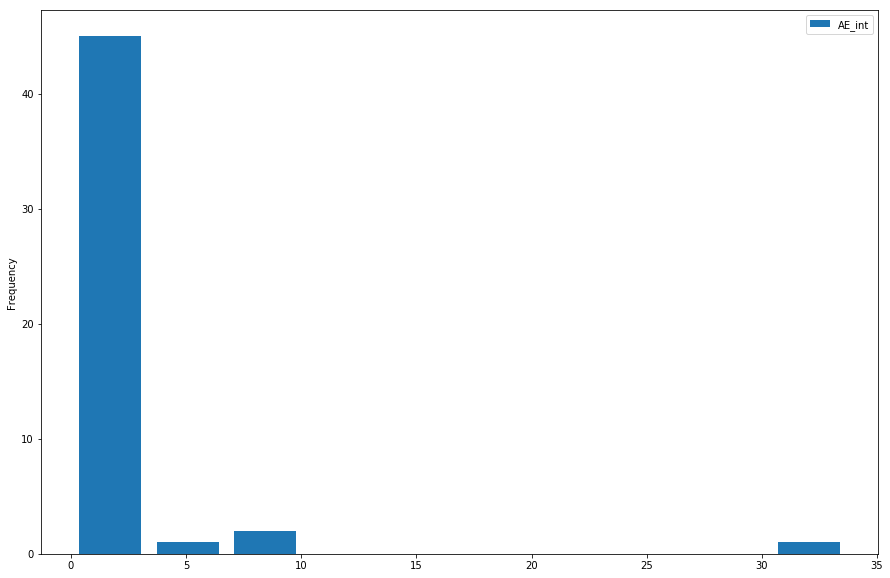

In [96]:
review_cases[['AE_int']].plot(kind='hist',rwidth=0.8, figsize=(15, 10))
plt.show()

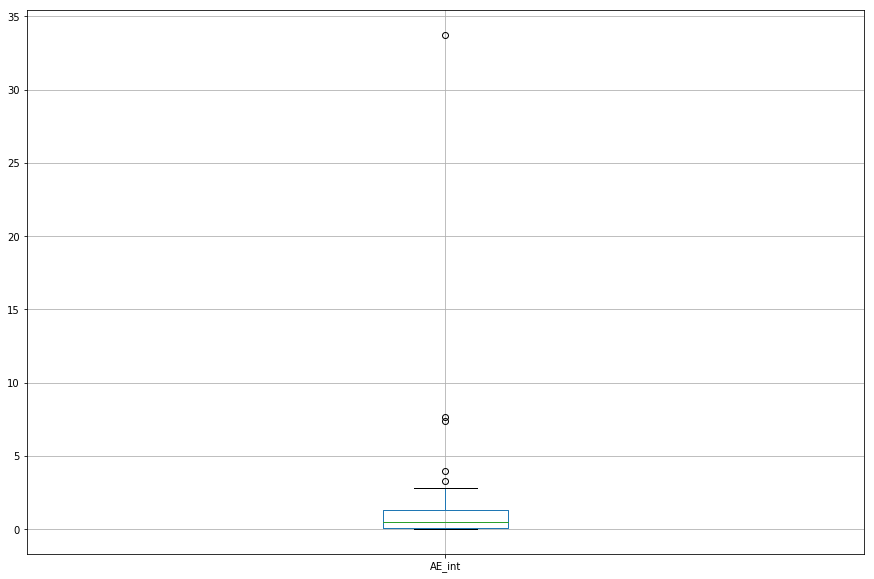

In [99]:
review_cases[['AE_int']].plot(kind='box', figsize=(15, 10), grid=True)
plt.show()

**Boxplots**

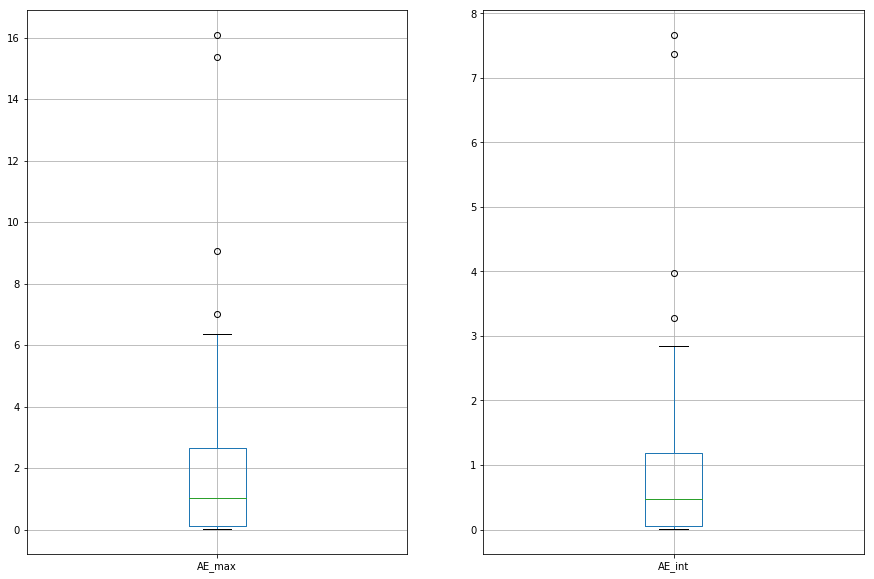

In [101]:
# without the one most efficient case
review_cases_filtered = review_cases[review_cases['AE_int'] < 10]
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
review_cases_filtered[['AE_max']].plot(kind='box', figsize=(15, 10), grid=True, ax=ax1)
review_cases_filtered[['AE_int']].plot(kind='box', figsize=(15, 10), grid=True, ax=ax2)
plt.show()

**Hydraulic and Organic loading rate versus aeration efficiency**

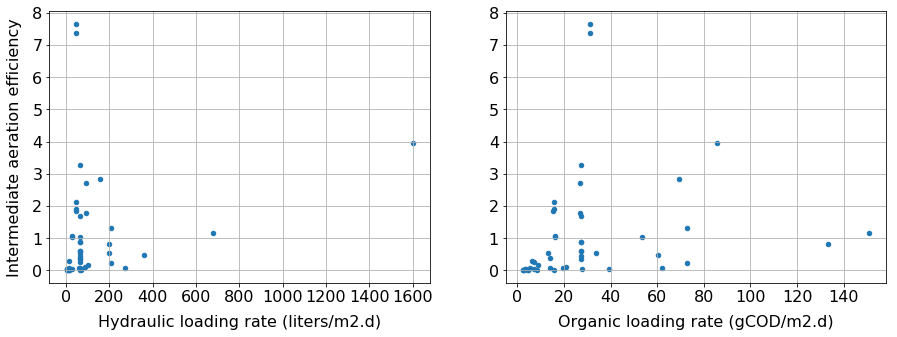

In [127]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fnt=16
labelpad=10
review_cases_filtered.plot(kind='scatter', x='HLR_lit_m2d', y='AE_int', ax=ax1, figsize=(15, 5), grid=True, fontsize=fnt)
review_cases_filtered.plot(kind='scatter', x='OLR_gCOD_m2d', y='AE_int', ax=ax2, figsize=(15, 5), grid=True, fontsize=fnt)
ax1.set_xlabel('Hydraulic loading rate (liters/m2.d)', fontsize=fnt, labelpad=labelpad)
ax2.set_xlabel('Organic loading rate (gCOD/m2.d)', fontsize=fnt, labelpad=labelpad)
ax1.set_ylabel('Intermediate aeration efficiency', fontsize=fnt, labelpad=labelpad)
ax2.set_ylabel('')
plt.show()

**Water depth versus aeration efficiency**

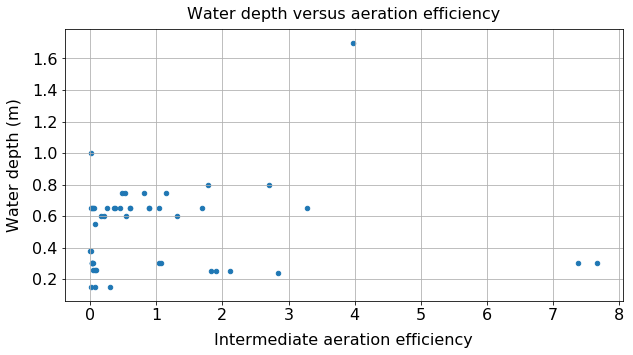

In [122]:
review_cases_filtered.plot(kind='scatter', x='AE_int', y='water_depth_m', figsize=(10, 5), grid=True, fontsize=fnt)
plt.title('Water depth versus aeration efficiency', fontsize=16, pad=10)
plt.xlabel('Intermediate aeration efficiency', fontsize=fnt, labelpad=labelpad)
plt.ylabel('Water depth (m)', fontsize=fnt, labelpad=labelpad)
plt.show()